In [1]:
##Data science Analysis of Electric Power consumption during Covid 19 Lockdown between March and June , The Data set has been
##imported from "https://www.kaggle.com/twinkle0705/state-wise-power-consumption-in-india"

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('power_consumption.csv')
#column names 
col_names = df.columns.tolist()
print(col_names)

['Unnamed: 0', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']


In [3]:
df.shape

(503, 34)

In [4]:
#rename the column number 1 to date
df.rename(columns={'Unnamed: 0':'date'},inplace = True)

In [5]:
df.head(3)

,date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5


In [6]:
df.dtypes

date                  object
Punjab               float64
Haryana              float64
Rajasthan            float64
Delhi                float64
UP                   float64
Uttarakhand          float64
HP                   float64
J&K                  float64
Chandigarh           float64
Chhattisgarh         float64
Gujarat              float64
MP                   float64
Maharashtra          float64
Goa                  float64
DNH                  float64
Andhra Pradesh       float64
Telangana            float64
Karnataka            float64
Kerala               float64
Tamil Nadu           float64
Pondy                float64
Bihar                float64
Jharkhand            float64
Odisha               float64
West Bengal          float64
Sikkim               float64
Arunachal Pradesh    float64
Assam                float64
Manipur              float64
Meghalaya            float64
Mizoram              float64
Nagaland             float64
Tripura              float64
dtype: object

In [7]:
df.isnull().any()

date                 False
Punjab               False
Haryana              False
Rajasthan            False
Delhi                False
UP                   False
Uttarakhand          False
HP                   False
J&K                  False
Chandigarh           False
Chhattisgarh         False
Gujarat              False
MP                   False
Maharashtra          False
Goa                  False
DNH                  False
Andhra Pradesh       False
Telangana            False
Karnataka            False
Kerala               False
Tamil Nadu           False
Pondy                False
Bihar                False
Jharkhand            False
Odisha               False
West Bengal          False
Sikkim               False
Arunachal Pradesh    False
Assam                False
Manipur              False
Meghalaya            False
Mizoram              False
Nagaland             False
Tripura              False
dtype: bool

<AxesSubplot:>

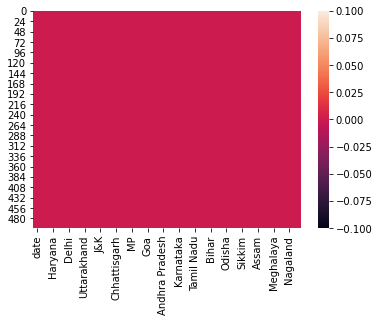

In [8]:
#checking the missing values using heat map
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [9]:
df_des=df.describe()
df_des

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


In [10]:
df_2=df.max()
df_2

date                 31/12/2019 00:00:00
Punjab                             300.0
Haryana                            237.2
Rajasthan                          278.0
Delhi                              147.1
UP                                 471.8
Uttarakhand                         53.2
HP                                  34.0
J&K                                 54.2
Chandigarh                           7.4
Chhattisgarh                       111.6
Gujarat                            400.8
MP                                 272.3
Maharashtra                        522.1
Goa                                 14.0
DNH                                 19.5
Andhra Pradesh                     205.1
Telangana                          256.2
Karnataka                          273.3
Kerala                              89.4
Tamil Nadu                         365.4
Pondy                                9.7
Bihar                              121.4
Jharkhand                           28.9
Odisha          

In [11]:
#getting the max power consumption for each states
df_2=df.max()
df_2.to_csv('df2.csv')

In [12]:
#reading the df2 dataset which contains the MW and state list
df2=pd.read_csv('df2.csv')
df2.rename(columns={'Unnamed: 0':'States','0':'MW'},inplace = True)
#df2.head(32)
#dropped the date row for obtain the top 5 power consumption states
df2=df2.drop([0])
#df2.head(33)
#sorting the data wrt to MW column for our convinience to get top 10 Consumed states
df2['MW']=df2['MW'].apply(np.float64)
a = df2.sort_values(by='MW',ascending=False)
a.head(34)
a.to_csv('MW.csv')

In [13]:
#graph showing the electricity consumed vs states in swam plot
a.head (10)

,States,MW
13,Maharashtra,522.1
5,UP,471.8
11,Gujarat,400.8
20,Tamil Nadu,365.4
1,Punjab,300.0
3,Rajasthan,278.0
18,Karnataka,273.3
12,MP,272.3
17,Telangana,256.2
2,Haryana,237.2


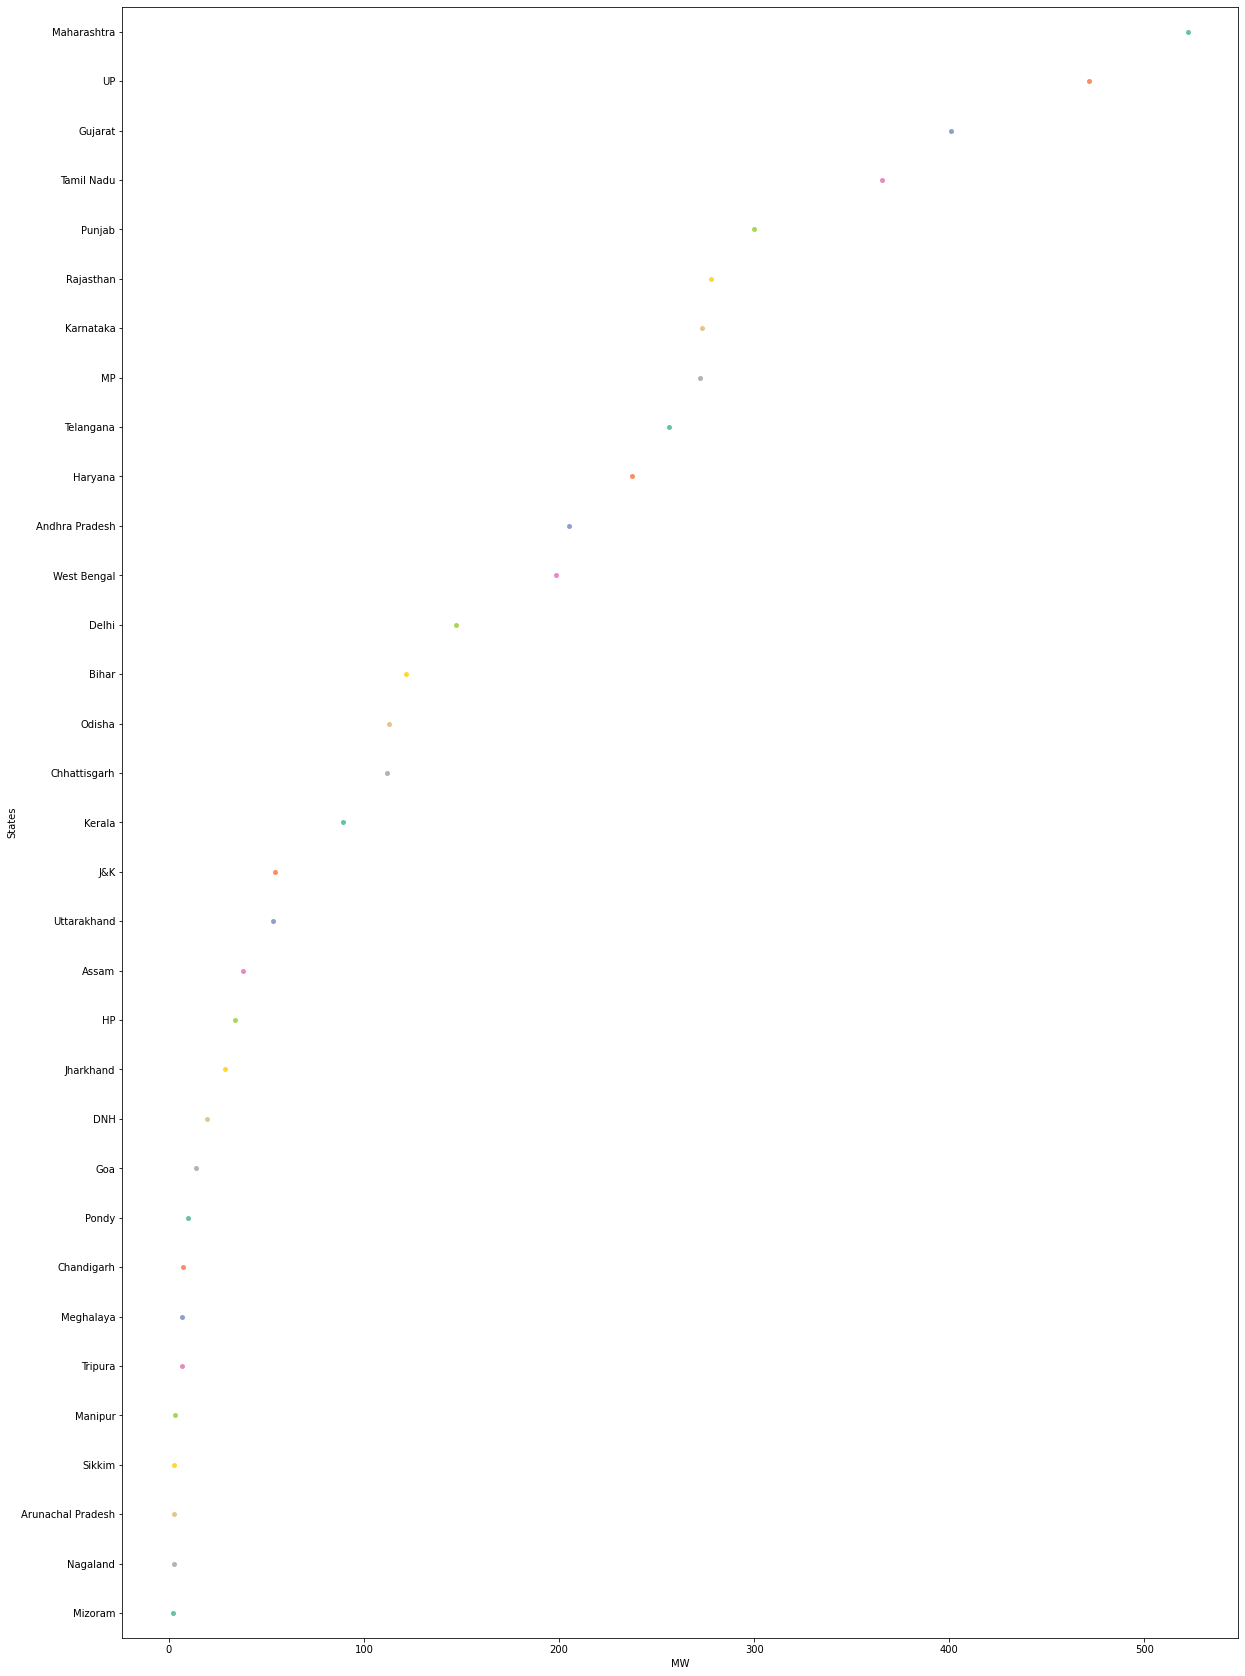

In [21]:
plt.figure(figsize=(20,30))
sns.swarmplot(x='MW',y='States',data=a,palette='Set2')
plt.savefig("Consumed electricity")